# Bearing failure Anomaly Detection
---

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
    * Data 전처리 및 EDA
    * 시계열 데이터 특성 추출
    * 이상 탐지 모델링

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

## **문제상황 및 데이터 살펴보기**
- 문제상황
---
- B사는 냉장고를 생산하는 업체이다. 냉장고 제작 공정은 컨베이어 벨트 방식으로 제작이 되며, 하나의 공정이 중단될 시 모든 공정이 All stop되는 매우 심각한 특성을 가진다. 
- 냉장고를 제작하는데 있어 주요 공정인 조립설비는 Bearing을 핵심 부품으로 사용한다. Bearing은 사용할 수록 마모가 되어 주기적으로 변경을 해줘야하는 부품 특성을 가지고 있다. 
- B사는 Bearing이 파손되기 이전에 이상점을 감지하여 사전 유지보수(구리스, 윤활제)를 통해 All stop을 사전에 방지하고자 한다.
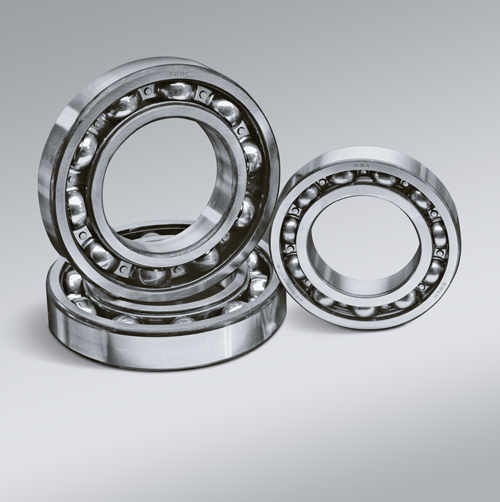

데이터 살펴보기
- Bearing Sensor data
- 데이터 명세

|Column|Description|
|:---|:---|
|index|측정 시간 Index|
|Bearing 1|베어링 1 진동 센서 값|
|Bearing 2|베어링 2 진동 센서 값|
|Bearing 3|베어링 3 진동 센서 값|
|Bearing 4|베어링 4 진동 센서 값|




In [10]:
filename

'2004.02.19.06.22.39'

In [11]:
dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
dataset

,-0.002,-0.002.1,-0.002.2,-0.002.3
0,-0.002,-0.002,0.000,-0.002
1,-0.002,-0.002,-0.002,0.000
2,-0.002,-0.002,-0.002,0.000
3,0.000,-0.002,-0.002,-0.002
4,-0.002,-0.002,-0.002,0.000
...,...,...,...,...
20474,-0.002,-0.002,-0.002,-0.002
20475,-0.002,-0.002,0.000,-0.002
20476,-0.002,0.000,0.000,-0.002
20477,-0.002,-0.002,0.000,-0.002


In [16]:
# 폴더에 저장된 대량의 데이터를 읽어서 하나의 파일로 저장하기, 데이터 준비하기
import os
import numpy as np
import pandas as pd

data_dir = "./bearing_data"  # /와 \를 잘 구분해서 사용바람.
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')  # 파일 하나를 읽어온다.
    dataset_mean_abs = np.array(dataset.abs().mean())                  # 파일에서 컬럼별로 절대값을 구하고 평균을 구한다.
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))     # reshape을 통해 1 by 4 형태로 구성하고 데이터프레임화 한다.
    dataset_mean_abs.index = [filename]                                # 파일이름을 인덱스로 설정한다. 
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118
2004.02.12.11.22.39,0.061665,0.073279,0.084879,0.044172
2004.02.12.11.32.39,0.061944,0.074593,0.082626,0.044659


In [21]:
# index의 데이터타입 확인
merged_data.index.astype

<bound method Index.astype of Index(['2004.02.12.10.52.39', '2004.02.12.11.02.39', '2004.02.12.11.12.39',
       '2004.02.12.11.22.39', '2004.02.12.11.32.39', '2004.02.12.11.42.39',
       '2004.02.12.11.52.39', '2004.02.12.12.02.39', '2004.02.12.12.12.39',
       '2004.02.12.12.22.39',
       ...
       '2004.02.19.04.52.39', '2004.02.19.05.02.39', '2004.02.19.05.12.39',
       '2004.02.19.05.22.39', '2004.02.19.05.32.39', '2004.02.19.05.42.39',
       '2004.02.19.05.52.39', '2004.02.19.06.02.39', '2004.02.19.06.12.39',
       '2004.02.19.06.22.39'],
      dtype='object', length=982)>

In [23]:
# index를 시간형태로 변환
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()  # index를 기준으로 정렬
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", merged_data.shape)
merged_data.head()

Dataset shape: (982, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [24]:
# pd.set option
import pandas as pd 
#pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)  

# Data read
df = pd.read_csv("Averaged_BearingTest_Dataset.csv")
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [25]:
df.columns = ['time', 'Bearing1','Bearing2','Bearing3','Bearing4']
df.head()

,time,Bearing1,Bearing2,Bearing3,Bearing4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659



## 문제해결 프로세스 정의
---
1) 문제정의
- 냉장고 공정 주요 조립설비의 고장이 발생하면 Line All stop 리스크(고장나서 라인스탑되면 베어링 교체하고 다시 돌리면 안되나? 라인스탑되면 생산이 늦어지고 납기가 늘어나고, 지연에 대한 소비자 불만 등으로 이어진다.)
- 조립설비의 핵심 부품인 Bearing 마모에 따른 설비 고장

2) 기대효과 (우리가 문제를 해결하면 뭐가 좋을까?)
- 설비고장 사전에 방지하여, Line stop 방지(설비가 쉬는 시간에 점검하자)
- Line stop으로 인한 점검 시간 및 비용 절감
- 계획 대비 생산량 달성

3) 해결방안 (사실 활용가능한 방법을 생각해봐야 한다, 현업의 로직활용, 경험에 의한 방법, 모델링에 의한 방법 등을 정하고 우선순위를 만든 후 달성 가능한 방법을 생각해봐야 한다).
- 베어링 센서 데이터 이상탐지를 통해 사전 고장발생 방지
    - Data 전처리 및 EDA 
    - 시계열 센서 데이터 분석 
    - 이상탐지 모델링 

4) 성과측정
- 모델 활용 전/후 Line stop 횟수 비교
- 모델 활용 전/후 계획 대비 생산률 비교

5) 현업적용
- Bearing Sensor Data 실시간 수집 체계 구축
- Model에 Input할 window time 결정 (예: 샘플링 주기가 1초인데, 이를 15분 정도 데이터가 모이면 평균화 해보자)
- Sensor Data Model Input 및 Alarm, 대시보드 만들기
- Anomaly Points 발견 시 유휴시간 장비 점검

## Data 전처리 및 EDA

### Data 전처리  
- 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인  
  (2) Data type 확인  
  (3) Null값 확인 (※ 빈 값의 Data)  
  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)    

In [26]:
# Data 형태 확인
# 982 row, 5 col로 구성됨
print('df :', df.shape)

df : (982, 5)


In [27]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      982 non-null    object 
 1   Bearing1  982 non-null    float64
 2   Bearing2  982 non-null    float64
 3   Bearing3  982 non-null    float64
 4   Bearing4  982 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.5+ KB


In [28]:
# Null 값 확인
print(df.isnull().sum())

time        0
Bearing1    0
Bearing2    0
Bearing3    0
Bearing4    0
dtype: int64


In [29]:
# Outlier 확인
df.describe()

,Bearing1,Bearing2,Bearing3,Bearing4
count,982.000000,982.000000,982.000000,982.000000
mean,0.080951,0.078543,0.081351,0.047830
std,0.040200,0.011789,0.011607,0.009549
min,0.001168,0.000767,0.000716,0.001699
25%,0.060773,0.074240,0.076829,0.043951
50%,0.062021,0.075206,0.078187,0.044524
75%,0.083277,0.077458,0.080575,0.048130
max,0.453335,0.161016,0.151299,0.119047


### Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [30]:
df.head()

,time,Bearing1,Bearing2,Bearing3,Bearing4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [31]:
# 시간형태 데이터 타입 변경 및 Index 설정
df['time'] = pd.to_datetime(df['time'])
df.set_index('time',inplace=True)

In [32]:
df

,Bearing1,Bearing2,Bearing3,Bearing4
time,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817


In [45]:
df.index

DatetimeIndex(['2004-02-12 10:52:39', '2004-02-12 11:02:39',
               '2004-02-12 11:12:39', '2004-02-12 11:22:39',
               '2004-02-12 11:32:39', '2004-02-12 11:42:39',
               '2004-02-12 11:52:39', '2004-02-12 12:02:39',
               '2004-02-12 12:12:39', '2004-02-12 12:22:39',
               ...
               '2004-02-19 04:52:39', '2004-02-19 05:02:39',
               '2004-02-19 05:12:39', '2004-02-19 05:22:39',
               '2004-02-19 05:32:39', '2004-02-19 05:42:39',
               '2004-02-19 05:52:39', '2004-02-19 06:02:39',
               '2004-02-19 06:12:39', '2004-02-19 06:22:39'],
              dtype='datetime64[ns]', name='', length=982, freq=None)

In [33]:
# Index name 변경
df.index.name=''

In [34]:
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4
,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [35]:
# 전체 Data 기간 확인
df.index.min(), df.index.max()

(Timestamp('2004-02-12 10:52:39'), Timestamp('2004-02-19 06:22:39'))

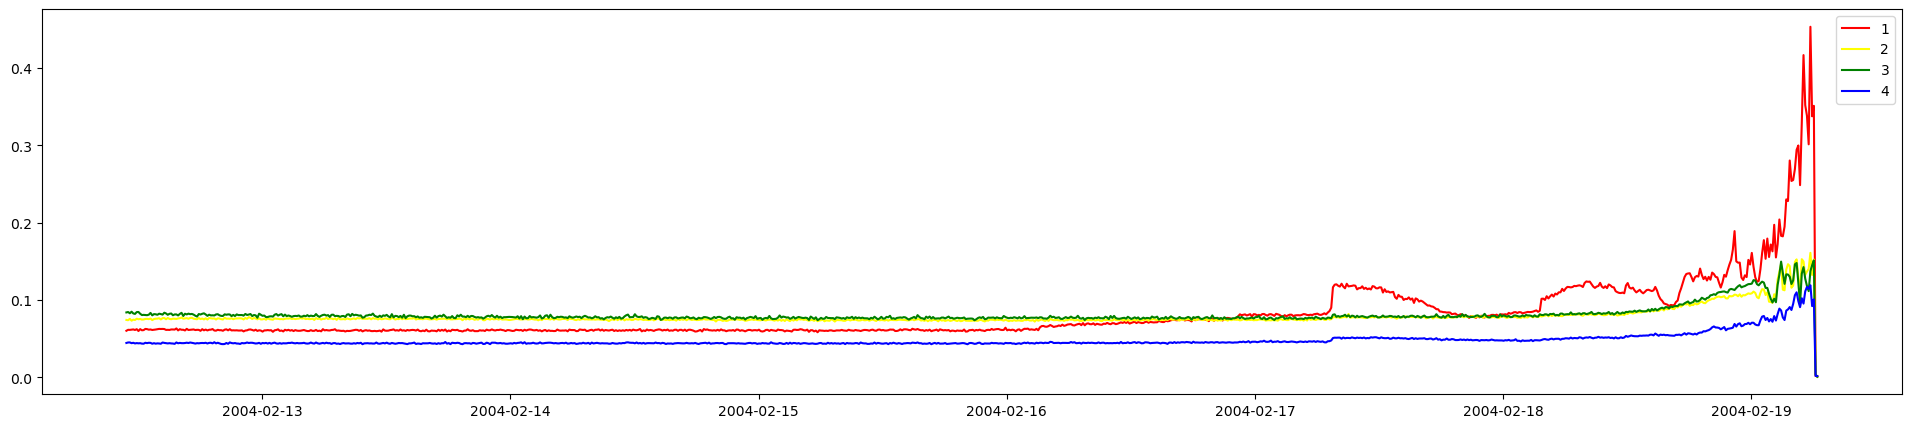

In [48]:
# Plotting 전체 데이터 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
#plt.style.use(['dark_background'])

plt.figure(figsize=(24,5))
plt.plot(df.index, df['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df.index, df['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df.index, df['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df.index, df['Bearing4'], linestyle='-', color='blue', label='4');
plt.legend();
# 뒷부분에서 고장이 발생된 듯 함.
# 2004년 2월 17일을 기준으로 나눠보자.

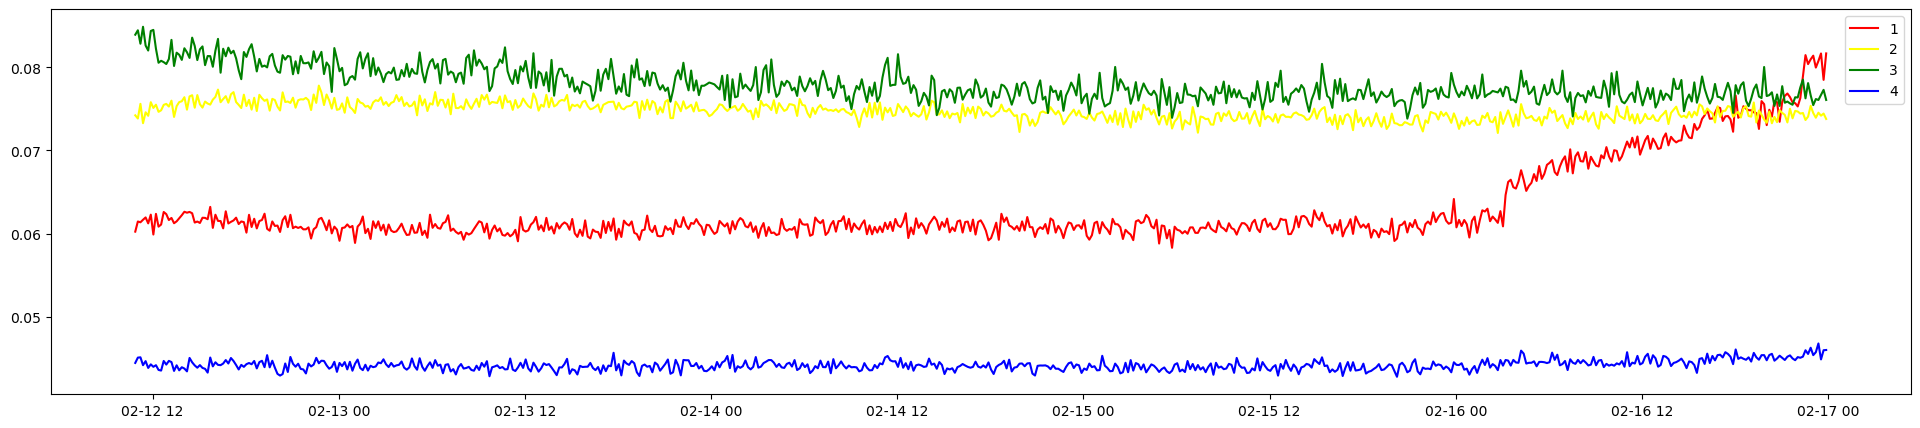

In [50]:
# Before Data 기간 확인
df_before = df[:'2004-02-17 00:00:00']

plt.figure(figsize=(24,5))
plt.plot(df_before.index, df_before['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df_before.index, df_before['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df_before.index, df_before['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df_before.index, df_before['Bearing4'], linestyle='-', color='blue', label='4');
plt.legend();
# 1번 베어링은 2월 16일쯤에서 부터 커진다.

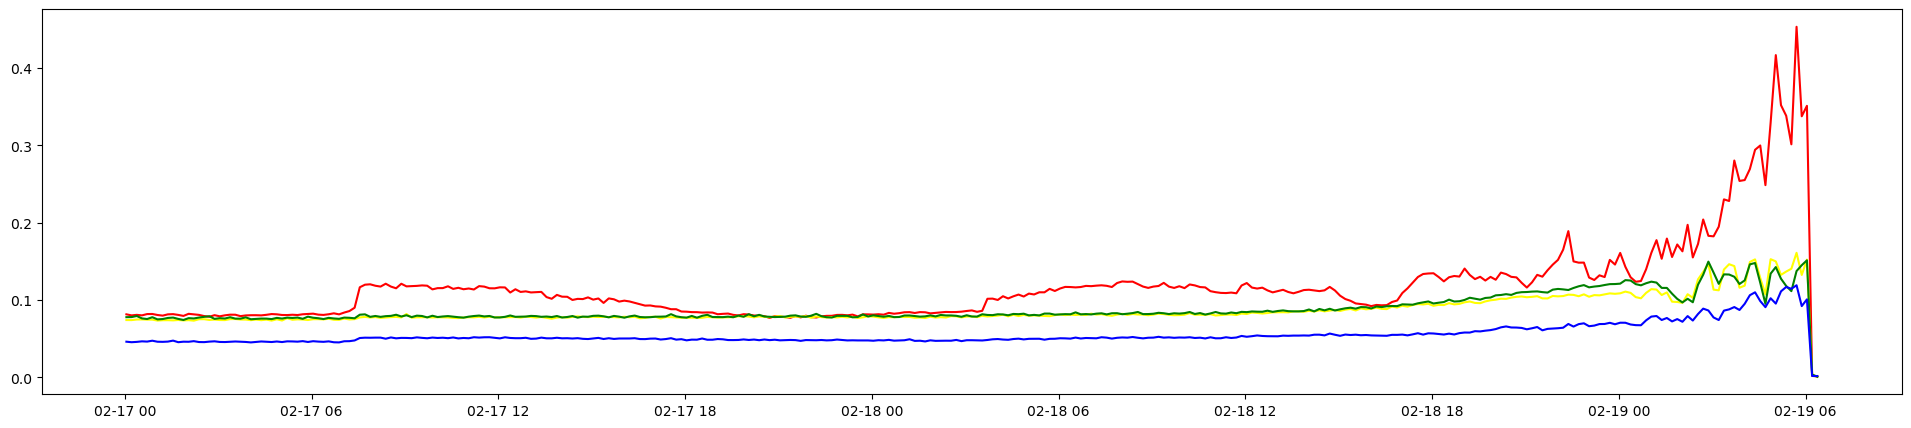

In [53]:
# ▶ After Data 기간 확인
df_after = df['2004-02-17 00:00:00':]

plt.figure(figsize=(24,5))
plt.plot(df_after.index, df_after['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df_after.index, df_after['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df_after.index, df_after['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df_after.index, df_after['Bearing4'], linestyle='-', color='blue', label='4');
# 베어링 2,3,4는 2월 19일부터 문제가 있어 보임.
# 베어링 1, 2, 3, 4에 대해 어느 정도 이상탐지를 위한 방법이 보이는 것 같음. 
# 베어링간 상관관계는 없다고 했으니, 단변량 이상탐지 방법도 가능

<AxesSubplot:xlabel='Bearing1', ylabel='Density'>

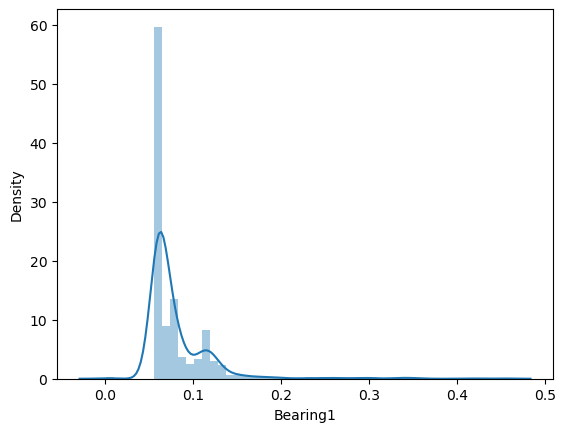

In [39]:
sns.distplot(df['Bearing1'])

## 시계열 데이터 특성 추출

### Date 관련 변수 추출

In [40]:
# 데이터 확인
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4
,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [41]:
# 년, 월, 요일, 시간
# [참조] x.year, x.month, x.day, x.hour, x.minute, x.second, x.microsecond, x.weekday()
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday']= df.index.weekday
df['hour']= df.index.hour
df['date'] = df.index.date
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date
,,,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,2004,2,3,10,2004-02-12
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,2004,2,3,11,2004-02-12
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,2004,2,3,11,2004-02-12
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,2004,2,3,11,2004-02-12
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,2004,2,3,11,2004-02-12


In [42]:
df.columns[0:4]

Index(['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4'], dtype='object')

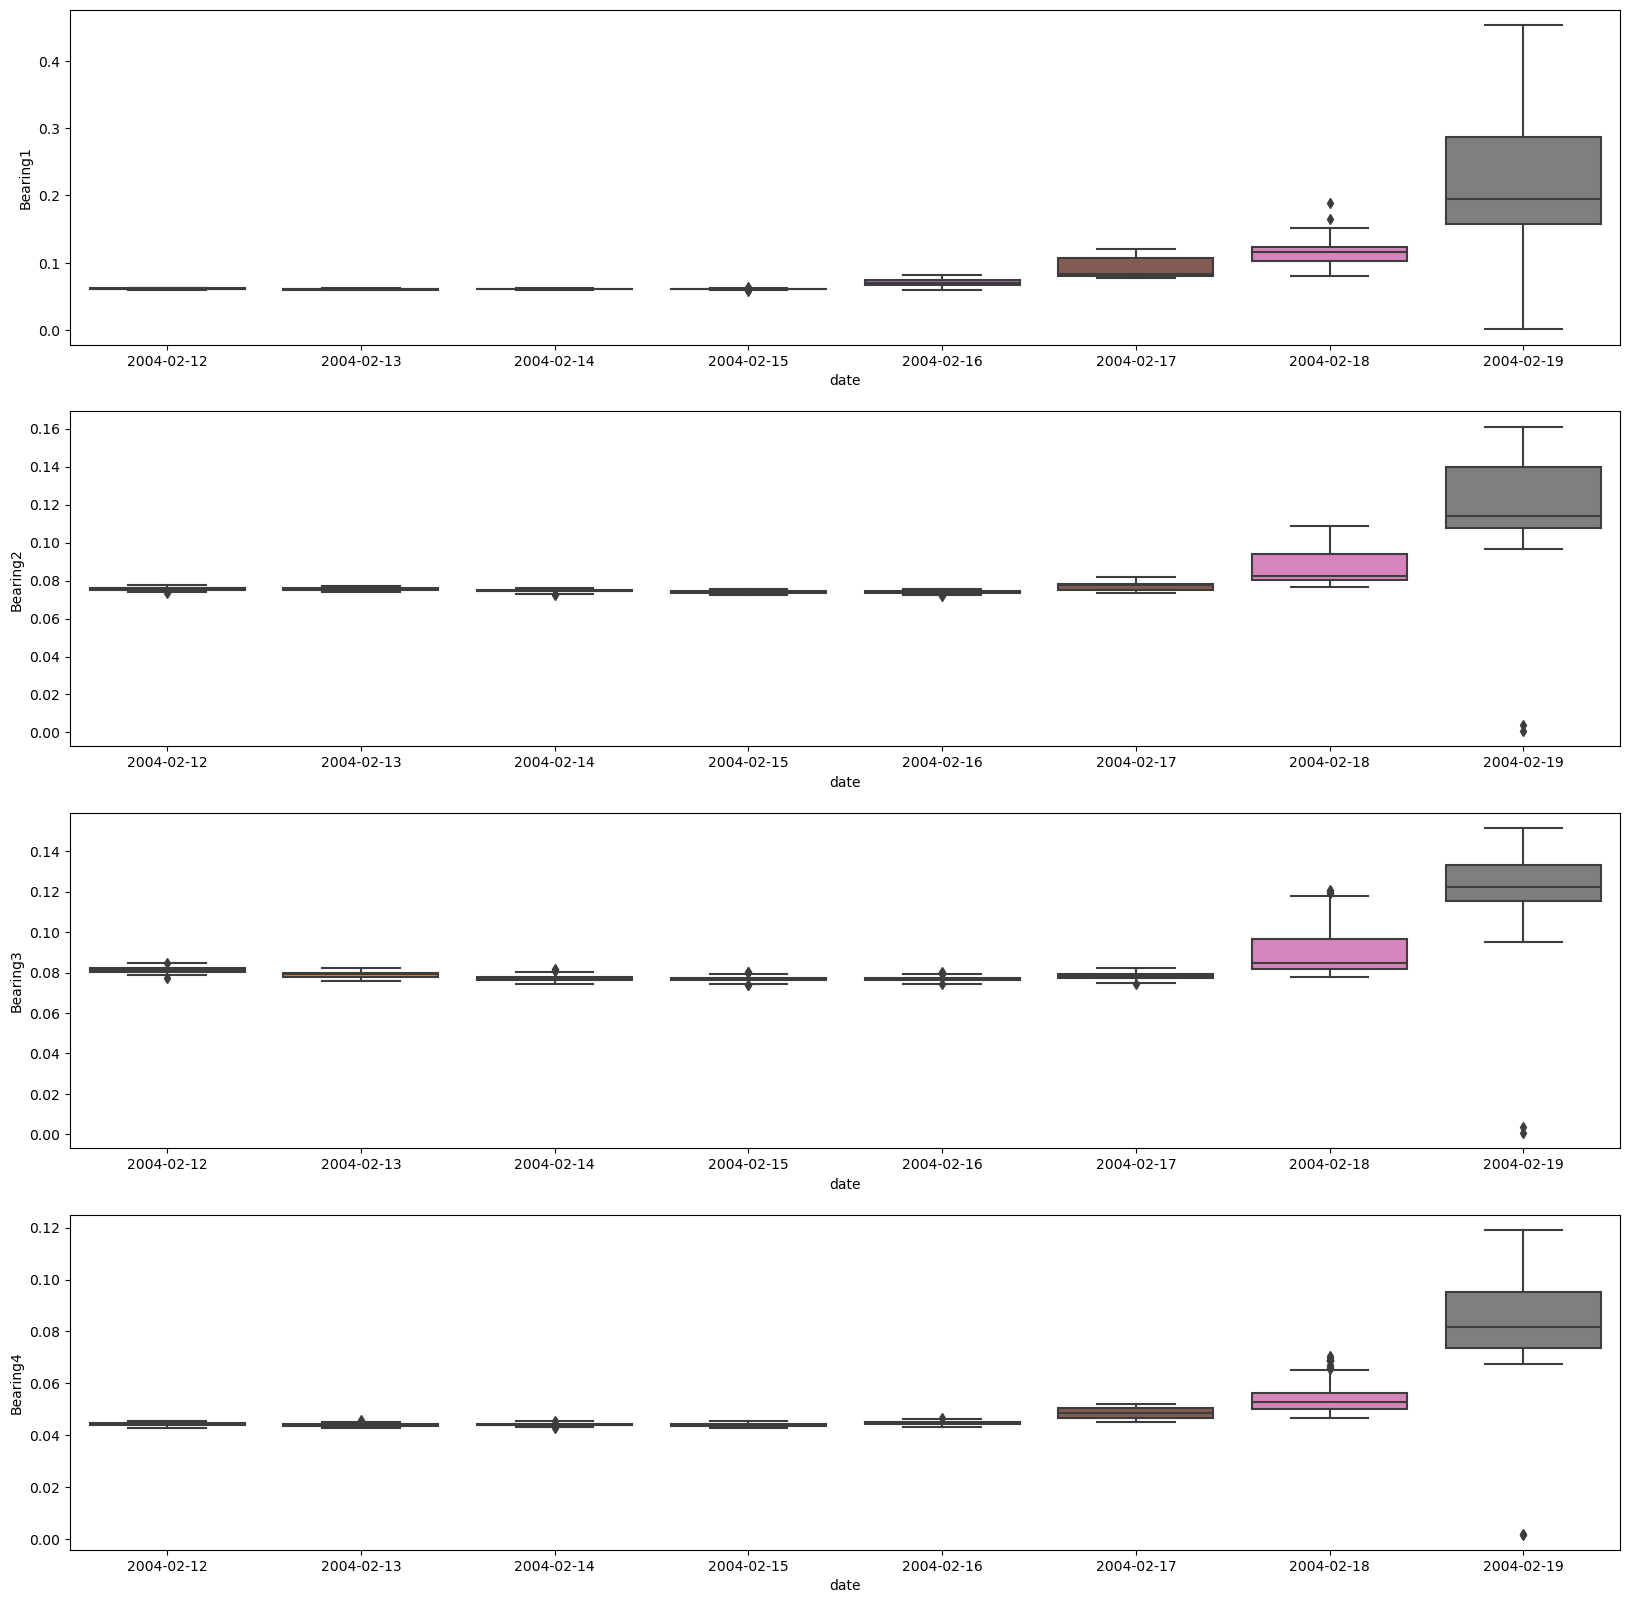

In [43]:
# ▶ Box plot 활용 일 별 Bearing 분포 확인
col_n = 1
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(df.columns[0:4]):
    sns.boxplot(x='date', y=col, data= df, ax=ax[int(i%row_n)])

### lag(지연) 데이터 생성
* 시계열 데이터에서 이전에 값을 고려할 때 lag(지연) 데이터를 사용

In [30]:
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date
,,,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,2004,2,3,10,2004-02-12
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,2004,2,3,11,2004-02-12
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,2004,2,3,11,2004-02-12
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,2004,2,3,11,2004-02-12
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,2004,2,3,11,2004-02-12


In [44]:
# shift 명령어 사용 ,lag 데이터 생성
df['Bearing1_lag'] = df['Bearing1'].shift(1)
df[['Bearing1', 'Bearing1_lag']]

,Bearing1,Bearing1_lag
,,
2004-02-12 10:52:39,0.060236,NaN
2004-02-12 11:02:39,0.061455,0.060236
2004-02-12 11:12:39,0.061361,0.061455
2004-02-12 11:22:39,0.061665,0.061361
2004-02-12 11:32:39,0.061944,0.061665
...,...,...
2004-02-19 05:42:39,0.453335,0.301344
2004-02-19 05:52:39,0.337583,0.453335
2004-02-19 06:02:39,0.351111,0.337583


In [34]:
# ▶ 'fill_value' = 0 옵션을 통해 NaN 값 처리
df['Bearing1_lag'] = df['Bearing1'].shift(1, fill_value=df['Bearing1'][0])
df[['Bearing1', 'Bearing1_lag']]

,Bearing1,Bearing1_lag
,,
2004-02-12 10:52:39,0.060236,0.060236
2004-02-12 11:02:39,0.061455,0.060236
2004-02-12 11:12:39,0.061361,0.061455
2004-02-12 11:22:39,0.061665,0.061361
2004-02-12 11:32:39,0.061944,0.061665
...,...,...
2004-02-19 05:42:39,0.453335,0.301344
2004-02-19 05:52:39,0.337583,0.453335
2004-02-19 06:02:39,0.351111,0.337583


In [ ]:
# ▶ Shift(n)을 통해 지연 기간 조정 가능
df['Bearing1_lag1'] = df['Bearing1'].shift(1, fill_value=0)
df['Bearing1_lag2'] = df['Bearing1'].shift(2, fill_value=0)
df[['Bearing1', 'Bearing1_lag1', 'Bearing1_lag2']]

,Bearing1,Bearing1_lag1,Bearing1_lag2
,,,
2004-02-12 10:52:39,0.060236,0.000000,0.000000
2004-02-12 11:02:39,0.061455,0.060236,0.000000
2004-02-12 11:12:39,0.061361,0.061455,0.060236
2004-02-12 11:22:39,0.061665,0.061361,0.061455
2004-02-12 11:32:39,0.061944,0.061665,0.061361
...,...,...,...
2004-02-19 05:42:39,0.453335,0.301344,0.338265
2004-02-19 05:52:39,0.337583,0.453335,0.301344
2004-02-19 06:02:39,0.351111,0.337583,0.453335


### 이동 평균(Rolling window)
---
* smoothing 효과

In [54]:
# rolling 명령어 사용 이동 평균 생성
df['bearing1_ma_3'] = df['Bearing1'].rolling(window=3).mean()
df[['Bearing1', 'bearing1_ma_3']]

,Bearing1,bearing1_ma_3
,,
2004-02-12 10:52:39,0.060236,NaN
2004-02-12 11:02:39,0.061455,NaN
2004-02-12 11:12:39,0.061361,0.061018
2004-02-12 11:22:39,0.061665,0.061494
2004-02-12 11:32:39,0.061944,0.061656
...,...,...
2004-02-19 05:42:39,0.453335,0.364315
2004-02-19 05:52:39,0.337583,0.364087
2004-02-19 06:02:39,0.351111,0.380676


In [55]:
# NaN 값 처리 
df['bearing1_ma_3'].fillna(df['Bearing1'], inplace=True)
df[['Bearing1', 'bearing1_ma_3']]

,Bearing1,bearing1_ma_3
,,
2004-02-12 10:52:39,0.060236,0.060236
2004-02-12 11:02:39,0.061455,0.061455
2004-02-12 11:12:39,0.061361,0.061018
2004-02-12 11:22:39,0.061665,0.061494
2004-02-12 11:32:39,0.061944,0.061656
...,...,...
2004-02-19 05:42:39,0.453335,0.364315
2004-02-19 05:52:39,0.337583,0.364087
2004-02-19 06:02:39,0.351111,0.380676


## 이상 탐지 모델링

### · Model Selection
---
* PCA Anomaly Detection
```
# 여러 변수 간에 존재하는 상관관계를 이용하여 이를 대표한 주성분을 추출해 차원을 축소하는 기법
# 기존 데이터의 유실을 최소하 하기 위해 데이터의 분산을 최대화 할 수 있는 초평면(Hyper plane)을 찾고 데이터를 투영함
# Auto encoder와 작동원리가 비슷함
# 다중공선성을 제거하기 위해 각 벡터의 축이 직각이 되도록 투영 시킴
# 원본 데이터의 Feature 개수에 비해 매우 적은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법
```
<img src = "https://drive.google.com/uc?id=16dNJTSMUiFmk4wQtJ7hP3HmL0wUy1vgP">

* 장단점
```
  # [good] 고차원에 데이터를 저차원에 주성분으로 표현할 수 있음
  # [good] 선택한 변수들의 해석이 용이함
  # [bad] 변수간 상관관계 고려가 어려움 
  # [bad] 추출된 변수의 해석이 어려움 (※ 주성분, PC1/PC2 ...)
```

### · 차원축소 및 변수 설명력 확인
---

In [35]:
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date,Bearing1_lag
,,,,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,2004,2,3,10,2004-02-12,0.060236
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,2004,2,3,11,2004-02-12,0.060236
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,2004,2,3,11,2004-02-12,0.061455
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,2004,2,3,11,2004-02-12,0.061361
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,2004,2,3,11,2004-02-12,0.061665


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = df[['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4']]


# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [37]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.935243
1,1,0.052920
2,2,0.007789
3,3,0.004048


### · 시각화 및 Threshold 선정
---





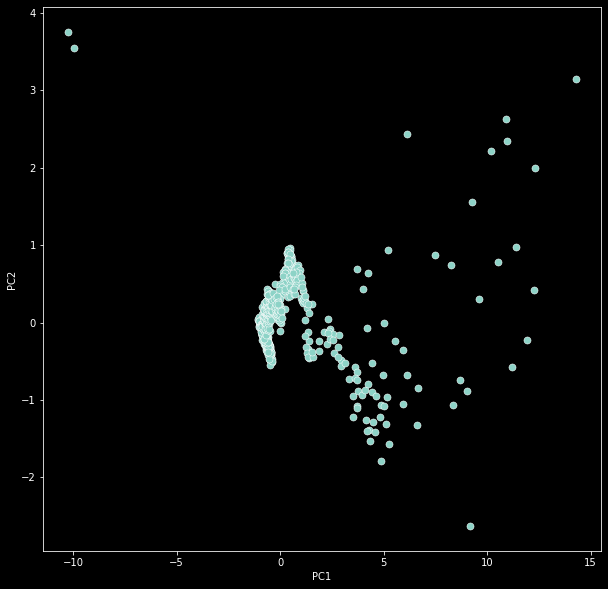

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 정규화
X_ = StandardScaler().fit_transform(df)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

pc_df=pd.DataFrame(pc,columns=['PC1', 'PC2']).reset_index(drop=True)

plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data=pc_df,x='PC1',y='PC2', legend='brief', s=50, linewidth=0.5);

# ▶ 각 클러스터 중심에서 멀리 떨어진 Data 일 수록 이상치

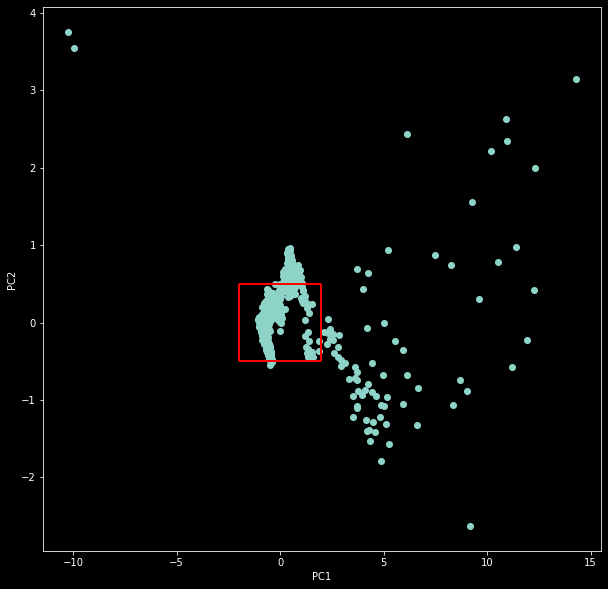

In [74]:
# ▶ PC1, PC2인 차원 축소 변수 2, -2를 기준으로 등급을 부여

sns.scatterplot(data=pc_df,x='PC1',y='PC2', s=50, linewidth=0);

# ▶ Normal grade
plt.vlines(-2, ymin=-0.5, ymax=0.5, color='r', linewidth=2);
plt.vlines(2, ymin=-0.5, ymax=0.5, color='r', linewidth=2);

plt.hlines(-0.5, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(0.5, xmin=-2, xmax=2, color='r', linewidth=2);

plt.gcf().set_size_inches(10, 10)

### · Abnormal Labeling
---





In [65]:
# ▶ np.where 활용 if문 
import numpy as np
pc_df['abnormal'] = np.where( (pc_df['PC1']>-2) & (pc_df['PC1']<2) & (pc_df['PC2']>-0.5) & (pc_df['PC2']<0.5), 0, 1)
pc_df.head(5)

,PC1,PC2,abnormal
,,,
2004-02-12 10:52:39,-0.509598,-0.478672,0
2004-02-12 11:02:39,-0.454730,-0.465373,0
2004-02-12 11:12:39,-0.446235,-0.416285,0
2004-02-12 11:22:39,-0.507399,-0.490065,0
2004-02-12 11:32:39,-0.516699,-0.381590,0


In [66]:
pc_df['abnormal'].value_counts()

0    813
1    169
Name: abnormal, dtype: int64

In [67]:
# ▶ 기존 Data의 index를 부여
pc_df.index = df.index
pc_df.head()

,PC1,PC2,abnormal
,,,
2004-02-12 10:52:39,-0.509598,-0.478672,0
2004-02-12 11:02:39,-0.454730,-0.465373,0
2004-02-12 11:12:39,-0.446235,-0.416285,0
2004-02-12 11:22:39,-0.507399,-0.490065,0
2004-02-12 11:32:39,-0.516699,-0.381590,0


In [68]:
# ▶ 기존 data와 Concat
df_concat = pd.concat([df, pc_df], axis=1)
df_concat.head()

,Bearing1,Bearing2,Bearing3,Bearing4,PC1,PC2,abnormal
,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,-0.509598,-0.478672,0
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,-0.454730,-0.465373,0
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,-0.446235,-0.416285,0
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,-0.507399,-0.490065,0
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,-0.516699,-0.381590,0


### · 모델 평가
---





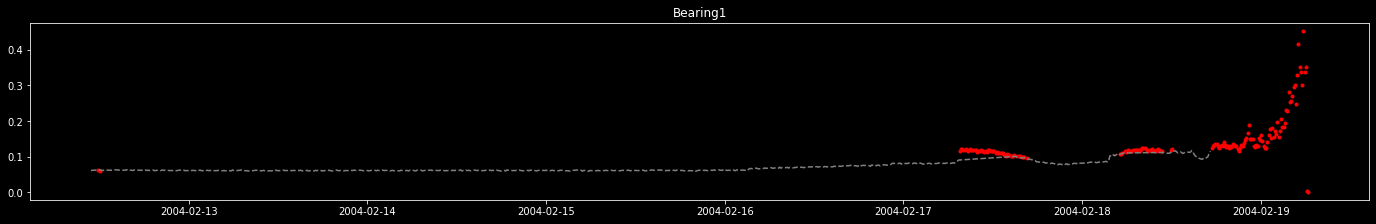

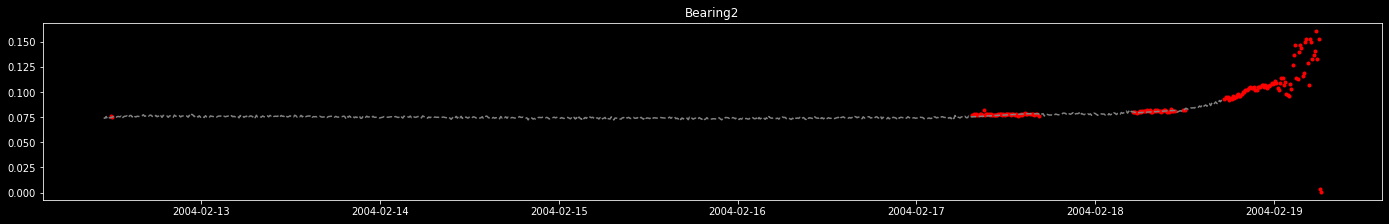

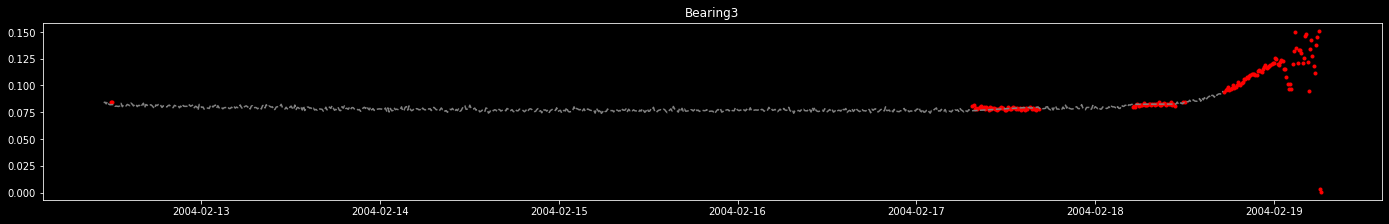

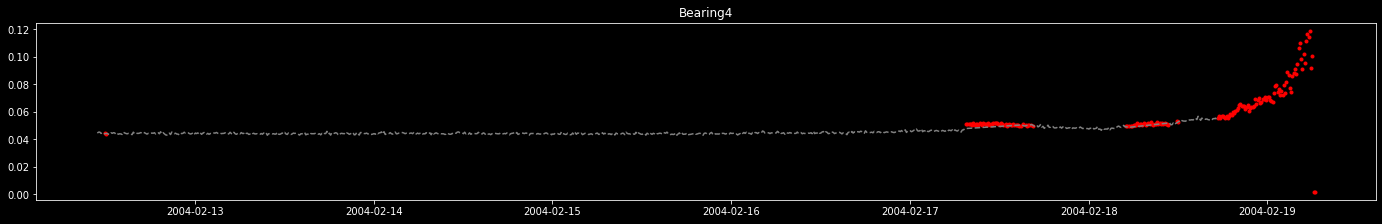

In [69]:
# ▶ Anomaly Points Plot

df_abnormal = df_concat[df_concat['abnormal']==1]
df_normal = df_concat[df_concat['abnormal']==0]

for v, i in  enumerate(df.columns[0:4]) :
  plt.figure(figsize=(24,15))
  plt.subplot(4, 1, v+1)
  plt.plot(df_abnormal.index, df_abnormal[i], 'o', color='red', markersize=3);
  plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');
  plt.title(i)